In [3]:
import pandas as pd

df = pd.read_csv('./jones-contributions-2018-02-13.csv')

In [9]:
pd.set_option('display.max_columns', 50)
df.head()

,CO_ID,ContributionAmount,ContributionDate,LastName,FirstName,MI,Suffix,Address1,Address2,City,State,Zip,Explanation,RecordID,FiledDate,ContributionType,"""ReceiptType""",ContributorType,Electioneering,CommitteeType,CommitteeName,CandidateName,Employer,Occupation,Amended,Amendment,AmendedRecordID,Jurisdiction,"""OccupationComments"""
0,20175032107,19207.31,2017-05-24 00:00:00,PEOPLE FOR MATT JONES,NaN,NaN,NaN,265 DAHLIA DR,NaN,LOUISVILE,CO,80027,FROM SENATE CANDIDATE COMMITTEE WHICH HAS BEEN...,4526022,2017-10-31 00:00:00,Monetary (Itemized),Other,Candidate Committee,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,NaN,NaN,N,N,0,BOULDER,NaN
1,20175032107,100.00,2017-05-24 00:00:00,BOHANNAN,BRUCE,NaN,NaN,383 DRIFTWOOD CIR,NaN,LAFAYETTE,CO,80026,PAYPAL,4640346,2017-10-31 00:00:00,Monetary (Itemized),Electronic Pay System,Individual,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,ARBOTECH,Construction/Engineering,N,N,0,BOULDER,NaN
2,20175032107,50.00,2017-05-24 00:00:00,BOIANI,DAWN,NaN,NaN,4707 DEVONSHIRE ST,NaN,DENVER,CO,80201,PAYPAL,4640348,2017-10-31 00:00:00,Monetary (Itemized),Electronic Pay System,Individual,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,SELF,Unknown,N,N,0,BOULDER,NaN
3,20175032107,100.00,2017-05-24 00:00:00,BROWN,DON,NaN,NaN,5050GRANT ST,NaN,LOUISVILLE,CO,80027,PAYPAL,4640353,2017-10-31 00:00:00,Monetary (Itemized),Electronic Pay System,Individual,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,OPTIMAL BLUE,General Business,N,N,0,BOULDER,NaN
4,20175032107,100.00,2017-05-24 00:00:00,GLUSTROM,LESLIE,NaN,NaN,4492 BURR PL,NaN,BOULDER,CO,80303,PAYPAL,4640423,2017-10-31 00:00:00,Monetary (Itemized),Electronic Pay System,Individual,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,SELF,Other,N,N,0,BOULDER,ENVIRONMENTAL SPECIALIST


In [68]:
df[df.ContributorType != 'Individual']

,CO_ID,ContributionAmount,ContributionDate,LastName,FirstName,MI,Suffix,Address1,Address2,City,State,Zip,Explanation,RecordID,FiledDate,ContributionType,"""ReceiptType""",ContributorType,Electioneering,CommitteeType,CommitteeName,CandidateName,Employer,Occupation,Amended,Amendment,AmendedRecordID,Jurisdiction,"""OccupationComments""",person
0,20175032107,19207.31,2017-05-24,PEOPLE FOR MATT JONES,NaN,NaN,NaN,265 DAHLIA DR,NaN,LOUISVILE,CO,80027,FROM SENATE CANDIDATE COMMITTEE WHICH HAS BEEN...,4526022,2017-10-31 00:00:00,Monetary (Itemized),Other,Candidate Committee,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,NaN,NaN,N,N,0,BOULDER,NaN,NaN
118,20175032107,1000.00,2017-08-16,COLORADO PROFESSIONAL FIRE FIGHTERS SMALL DONO...,NaN,NaN,NaN,433 S ALLISON PARKWAY #100,NaN,LAKEWOOD,CO,80226,"COLORADO PROFESSIONAL FIRE FIGHTERS, SMALL DON...",4559502,2017-10-31 00:00:00,Monetary (Itemized),Check,Small Donor Committee,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,NaN,NaN,N,N,0,BOULDER,NaN,NaN
166,20175032107,550.00,2017-09-06,COLORADO COMMIT OF AUTOMOTIVE RETAILERS,NaN,NaN,NaN,290 SPEER BLVD,NaN,DENVER,CO,80203,DEPOSIT DATE,4638572,2017-10-31 00:00:00,Monetary (Itemized),Check,Unknown,NaN,Candidate Committee,PEOPLE FOR MATT JONES,MATT JONES,NaN,NaN,N,N,0,BOULDER,NaN,NaN


In [69]:
df['ContributionDate'] = pd.to_datetime(df.ContributionDate)

print('''Matt Jones has received {} total contributions from {} unique people ({} unique addresses) between {:%Y-%m-%d} and {:%Y-%m-%d}.'''.format(
        df.shape[0],
        len(set(df['FirstName'] + df['LastName'] + df['Address1'])),
        df['Address1'].nunique(),
        df.ContributionDate.min(),
        df.ContributionDate.max()
    ))

Matt Jones has received 349 total contributions from 311 unique people (310 unique addresses) between 2017-05-24 and 2017-10-27.


In [43]:
contribs_by_month = df.groupby(pd.Grouper(key='ContributionDate', freq='M')).CO_ID.count().reset_index().rename(columns={'CO_ID': 'n'})

In [70]:
df.ContributionAmount.sum()

61376.42

In [54]:
df['person'] = df['FirstName'] + ' ' + df['LastName'] + ' ' + df['Address1']

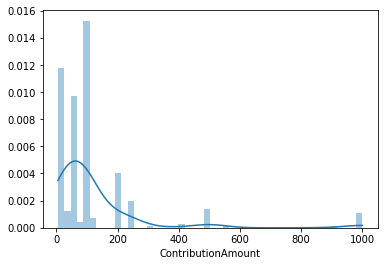

In [77]:
import seaborn as sns

sns.distplot(df.iloc[1:].ContributionAmount, kde_kws={'cut': 0})

In [78]:
df.iloc[1:].ContributionAmount.describe()

count     348.000000
mean      121.175603
std       172.710099
min         5.000000
25%        27.000000
50%       100.000000
75%       100.000000
max      1000.000000
Name: ContributionAmount, dtype: float64

In [63]:
df.iloc[1:].groupby('Occupation').ContributionAmount.agg({'mean': 'mean', 'n': 'count'}).sort_values(by='n', ascending=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,n,mean
Occupation,,
Not Currently Employed,87,94.440345
Other,66,143.439394
Unknown,51,97.941176
Retired,47,122.446809
Attorney/Legal,23,122.826087
Consultant,12,90.900000
General Business,7,128.571429
Financial/Investment,7,197.857143
Healthcare/Medical,6,102.500000


In [79]:
df['boco'] = df.City.isin(['BOULDER', 'LONGMONT', 'BOLDER', 'BOULDER CO', 'LAFAYETTE', 'LOUISVILLE', 'ERIE'])

In [82]:
df[1:].groupby('boco').ContributionAmount.agg({'mean': 'mean', 'n': 'count', 'sum': 'sum'})

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,n,mean,sum
boco,,,
False,85,143.941176,12235.00
True,263,113.817909,29934.11


In [89]:
df.ContributionAmount.describe(percentiles=[.1, .95])

count      349.000000
mean       175.863668
std       1036.111387
min          5.000000
10%         25.000000
50%        100.000000
95%        500.000000
max      19207.310000
Name: ContributionAmount, dtype: float64

In [60]:
df.iloc[1:].groupby('City').ContributionAmount.agg({'mean': 'mean', 'n': 'count'}).sort_values(by='mean', ascending=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,n,mean
City,,
LAKEWOOD,2,600.000000
SILVERTHORNE,1,250.000000
FRISCO,1,250.000000
THORNTON,1,200.000000
GRAND JUNCTION,1,200.000000
DENVER,27,186.111111
WESTMINSTER,3,183.333333
BOULDER,85,176.297765
GREELEY,6,175.000000
